In [1]:
%pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshayramakrishnan28
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:20<00:00, 122MB/s] 


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/content/chest-xray-pneumonia/chest_xray/chest_xray/train', target_size=(224,224), color_mode='grayscale', batch_size=32, class_mode='binary')
val_data   = val_datagen.flow_from_directory('/content/chest-xray-pneumonia/chest_xray/chest_xray/val', target_size=(224,224), color_mode='grayscale', batch_size=32, class_mode='binary')
test_data  = test_datagen.flow_from_directory('/content/chest-xray-pneumonia/chest_xray/chest_xray/test', target_size=(224,224), color_mode='grayscale', batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(224, 224, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
import time

start_time = time.time()

history = model.fit(train_data, validation_data=val_data, epochs=5)

end_time = time.time()

print(f"\n Total Training Time: {end_time - start_time:.2f} seconds")
print(f" Average Time per Epoch: {(end_time - start_time)/5:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8164 - loss: 0.6664

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.8169 - loss: 0.6642 - val_accuracy: 0.9375 - val_loss: 0.1592
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 491s 3s/step - accuracy: 0.9540 - loss: 0.1233 - val_accuracy: 0.7500 - val_loss: 0.4074
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.9705 - loss: 0.0891 - val_accuracy: 0.9375 - val_loss: 0.1650
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.9751 - loss: 0.0705 - val_accuracy: 0.9375 - val_loss: 0.1534
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.9810 - loss: 0.0584 - val_accuracy: 0.8125 - val_loss: 0.1844

 Total Training Time: 2533.92 seconds
 Average Time per Epoch: 506.78 seconds


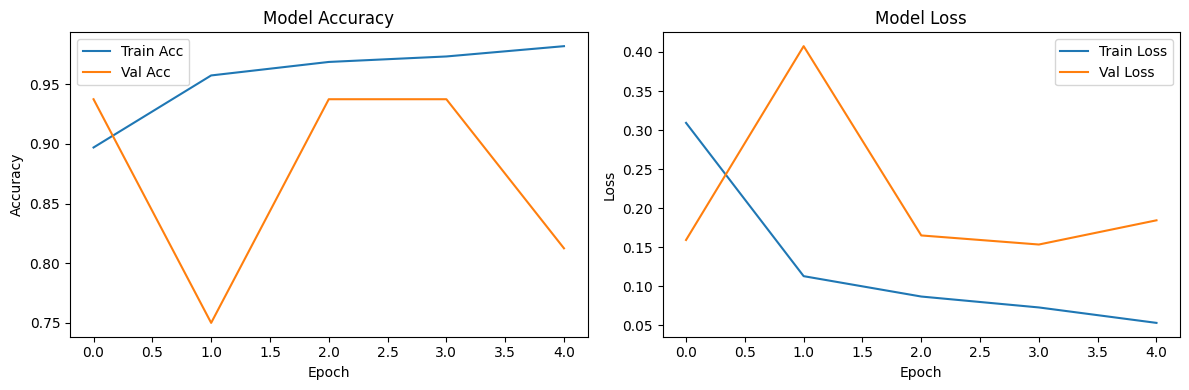

In [6]:
import matplotlib.pyplot as plt

history = model.history.history

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 824ms/step - accuracy: 0.7911 - loss: 0.9123
Test Accuracy: 0.79, Test Loss: 0.9537


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get ground truth and predictions
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 843ms/step
[[ 48 186]
 [ 71 319]]
              precision    recall  f1-score   support

      NORMAL       0.40      0.21      0.27       234
   PNEUMONIA       0.63      0.82      0.71       390

    accuracy                           0.59       624
   macro avg       0.52      0.51      0.49       624
weighted avg       0.55      0.59      0.55       624



In [9]:
import time
start = time.time()
model.evaluate(test_data)
print("Evaluation Time:", round(time.time() - start, 2), "seconds")

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 835ms/step - accuracy: 0.7771 - loss: 1.1109
Evaluation Time: 17.19 seconds
